In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
sns.set()

In [80]:
one_week_results = pd.read_csv("results/amzn_result_one_week.csv", index_col=0)

In [119]:
data = one_week_results.copy()

In [120]:
data

,Date,Subreddit,Tag,Classifier,Dictionary_Tag
0,2020-10-11,dividends,Neutral,0.644,0.000000
1,2020-10-11,Forex,Negative,0.836,0.000000
2,2020-10-11,Forex,Negative,0.990,0.500000
3,2020-10-11,Forex,Negative,0.942,0.000000
4,2020-10-11,investing,Negative,0.917,0.500000
...,...,...,...,...,...
150,2020-10-15,stocks,Negative,0.968,0.500000
151,2020-10-15,stocks,Negative,0.994,0.333333
152,2020-10-16,trading212,Positive,0.975,0.000000
153,2020-10-15,wallstreetbets,Negative,0.880,0.500000


In [112]:
reference_date = date.fromisoformat(data["Date"][0])
def date_to_int(a_date):
    return int((date.fromisoformat(a_date) - reference_date).days)
vdate_to_int = np.vectorize(date_to_int)
data["Time"] = vdate_to_int(data["Date"])
print(data["Time"])

0      0
1      0
2      0
3      0
4      0
      ..
150    4
151    4
152    5
153    4
154    4
Name: Time, Length: 155, dtype: int32


In [113]:
data = data.drop(columns=["Classifier", "Dictionary_Tag", "Date"])
neg_count = data[data["Tag"] == "Negative"].drop(columns="Tag")
pos_count = data[data["Tag"] == "Positive"].drop(columns="Tag")
neutral_count = data[data["Tag"] == "Neutral"].drop(columns="Tag")

In [114]:
pos_count = pd.DataFrame(pos_count.groupby("Time").count())["Subreddit"]
neg_count = pd.DataFrame(neg_count.groupby("Time").count())["Subreddit"]
neutral_count = pd.DataFrame(neutral_count.groupby("Time").count())["Subreddit"]

In [116]:
pos_count = pos_count.append(pd.Series([0]))
neutral_count = neutral_count.append(pd.Series([0]))
neutral_count = neutral_count.append(pd.Series([0]))

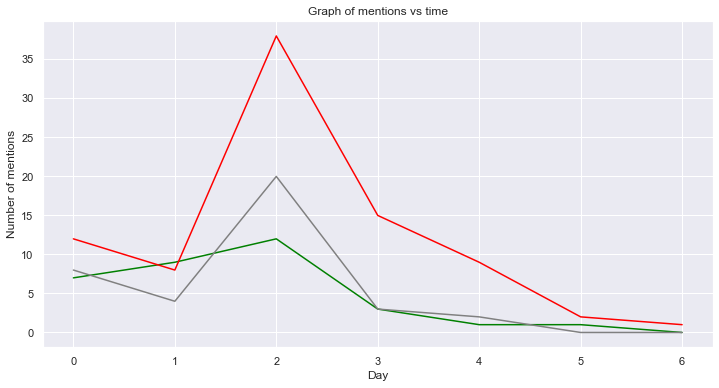

In [123]:
plt.rc('figure', figsize=(12, 6))
X = np.linspace(0, 6, 7)
plt.plot(X, pos_count, color="green")
plt.plot(X, neg_count, color="red")
plt.plot(X, neutral_count, color="gray")
plt.xlabel("Day")
plt.ylabel("Number of mentions")
plt.title("Graph of mentions vs time")
plt.savefig('mentions_over_time.png')
plt.show()